In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [16]:
df_parents = pd.read_csv('../data/df_max_parents_other_infections.csv').rename(columns = {' cov_weight':'COVID_weight','IAV_weight':'IAV_weight','TB_ave_weight':'TB_weight_loss'})

1.2623988985689307 0.2331738388274817
-0.3885462659282199 -0.45629419550772643
-0.04200174334326739 -0.07285616634458038
-6.564352074750066 -0.6736085283718193
-0.7426198294373321 -0.054703748108500365
-0.3099533790905397 -0.5552658257224574
-0.2990015074349132 -0.3886662199083074


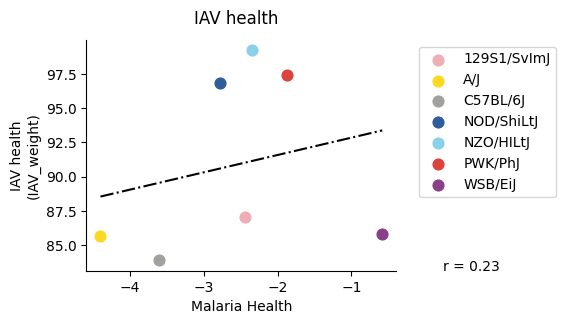

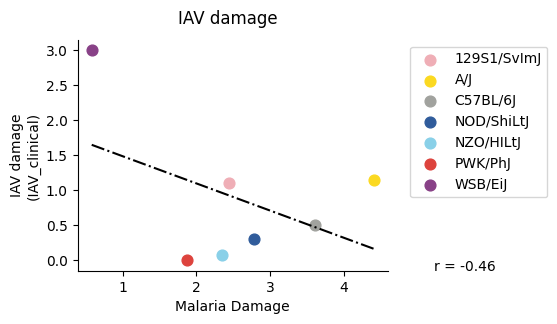

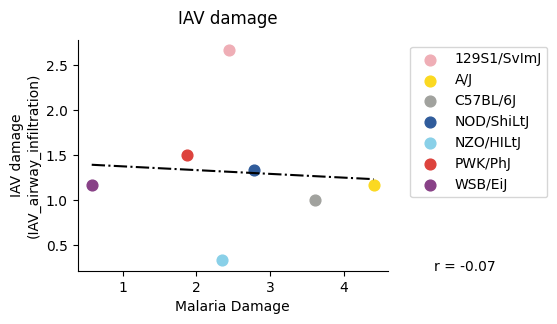

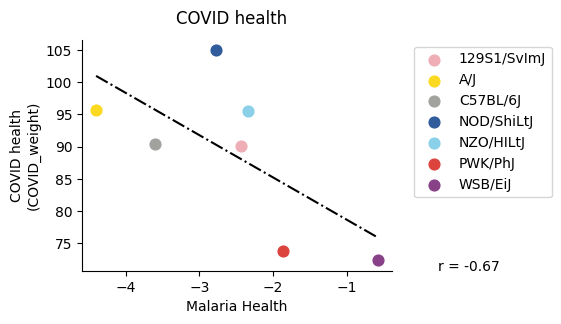

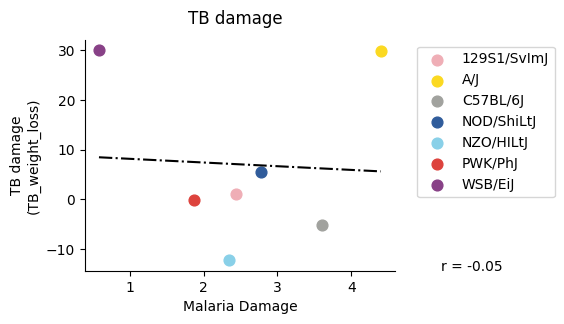

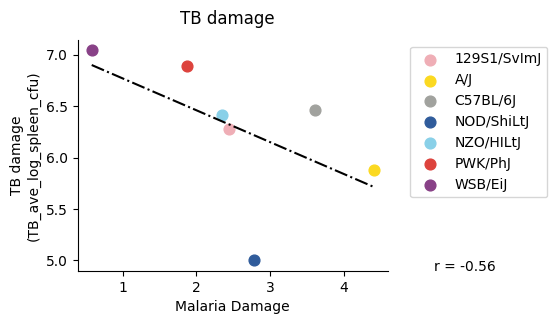

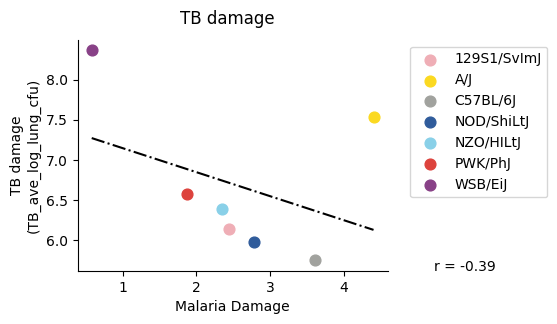

In [10]:
others = ['IAV_weight','IAV_clinical','IAV_airway_infiltration','COVID_weight','TB_weight_loss','TB_ave_log_spleen_cfu','TB_ave_log_lung_cfu']
%matplotlib inline
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}

for o in others:
    fig,ax = plt.subplots(figsize = (4,3))
    disease = o.split('_')[0]
    if o=='IAV_weight' or o=='COVID_weight':
        x = []
        y = []
        for strain, strain_data in df_parents.groupby('Strain'):
                if strain != 'CAST/EiJ':
                    ax.scatter(-strain_data['Max.Weight.Delta'].mean(),strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    x.append(-strain_data['Max.Weight.Delta'].mean())
                    y.append(strain_data[o].mean())
        ax.set_xlabel('Malaria Health')
        ax.set_ylabel(disease+' health\n('+o+')')
        fig.suptitle(disease+' health')
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        x_to_plot = np.sort(x)
        y_fit = slope * np.array(x_to_plot) + intercept
        ax.plot(x_to_plot,y_fit, '-.', color = 'black')
        print(slope, r_value)

    else:
        x = []
        y = []
        for strain, strain_data in df_parents.groupby('Strain'):
            if strain != 'CAST/EiJ':
                if o=='TB_weight_loss':
                    ax.scatter(strain_data['Max.Weight.Delta'].mean(),-strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    #ax.errorbar(strain_data['Max.Weight.Delta.zscore'].mean(),-strain_data[o].mean(), xerr=strain_data['Max.Weight.Delta.zscore'].std(), label=strain,marker = '.',markersize = 20)
                    x.append(strain_data['Max.Weight.Delta'].mean())
                    y.append(-strain_data[o].mean())

                else:
                    ax.scatter(strain_data['Max.Weight.Delta'].mean(),strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    x.append(strain_data['Max.Weight.Delta'].mean())
                    y.append(strain_data[o].mean())
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        x_to_plot = np.sort(x)
        y_fit = slope * np.array(x_to_plot) + intercept
        ax.plot(x_to_plot,y_fit, '-.', color = 'black')
        ax.set_xlabel('Malaria Damage')
        ax.set_ylabel(disease+' damage\n('+o+')')
        fig.suptitle(disease+' damage')
        print(slope, r_value)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    ax.spines[['top','right']].set_visible(False)
    fig.savefig(f'{o}.png',dpi = 600, bbox_inches = 'tight')
    fig.savefig(f'{o}.pdf',dpi = 600, bbox_inches = 'tight')
    ax.text(1.15, 0, f'r = {r_value:.2f}',transform=ax.transAxes)
    #fig.savefig(f'/Users/yaelleb/Desktop/Documents/WIS/Alon Lab/Pathogen Response Project/Pathogen_Response_Project/Damage_Response_Network/figures/damage_corr_parent_strains/{o}.png',bbox_inches = 'tight')